# Normal People Using Matplotlib

This notebook demonstrates how to use the [Wee People](https://github.com/propublica/weepeople) font to make a plot of a normal distribution built out of people using Matplotlib in Python. Inspired by a [Tweet by Matthew Kay](https://twitter.com/mjskay/status/1519156106588790786) on doing the same thing (much more easily!) with ggplot2 in R.

In [1]:
# Libraries for downloading the font
from tempfile import NamedTemporaryFile
from urllib.request import urlopen

# Libraries for working with the font in Matplotlib and converting characters to Paths
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
from matplotlib.textpath import TextToPath
from matplotlib.path import Path
from matplotlib.font_manager import FontProperties

# Usual libraries for plotting, working with arryas, and working with distributions
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import scipy.stats as stats

In [2]:
# Get the Wee People True Type Font

github_url = 'https://github.com/propublica/weepeople/blob/master/weepeople.ttf'

url = github_url + '?raw=true'  # You want the actual file, not some html

response = urlopen(url)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()

fp = fm.FontProperties(fname=f.name, size=10)

In [3]:
# A function to return a Matplotlib path from a given letter character
# (lower case or upper case)

def get_marker(symbol):
    v, codes = TextToPath().get_text_path(fp, symbol)
    v = np.array(v)

      #v = np.flipud(v)
    mean = np.mean([np.max(v,axis=0), np.min(v, axis=0)], axis=0)
    #print(mean)
    # Correction to align center at specified point
    mean[0]*=1.5
    # Correction to put feet at specified point
    mean[1]*=0
    v = v -mean
    # Randomly flip horizontally
    if npr.randint(2):
      v[:,0] = -v[:,0]
   
    return Path(v, codes, closed=False)
  


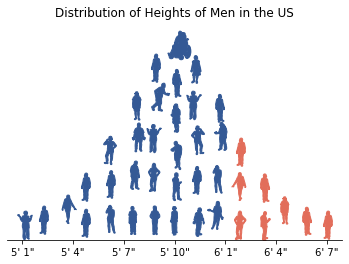

In [4]:
# Change the value of seed to get different people in different places
seed = 278 
npr.seed(seed)

# Vector of ASCII character codes to choose from (upper and lower case letters)
ascii_letters = np.hstack((np.arange(65,91), np.arange(97,123)) )


# Use the standard normal distribution. We can relabel the axes however we want later 
X=stats.norm()
x=np.arange(-3,3.2,0.43)

# Create a vector to keep track of which symbols we have used recently so we don't
# reuse symbols in the same area
recents=np.zeros(10)
recent_index=0


height=0.075
for t in x:
  # Change color once we get an x-axis value greater than or equal to 1
  if t < 1:
    color = '#345995'
  else:
    color = '#e26d5a'
    
  # Get the value of the pdf at this x-axis value
  p = X.pdf(t)
  
  # Determine how many people we can stack based on the pdf height
  steps = int(np.ceil(p/height)-0.5)
  
  # Draw all the people at this x-axis value, except the top one

  for i in range( steps ):
    pos = i*p/steps + (p - (steps)*height)/(steps-i+2)
    # Add random shifts to the position to make
    # the plot more interesting
    pos += 0.005*X.rvs()+0.006
    t += 0.02*X.rvs()+0.005
    
    # These offsets are to optimize some positions in the example
    if np.round(t,1) == 0.4 and np.round(pos,1) == 0.3:
      t +=0.02
      pos -=0.02

    # Choose a character number at random, but not recent
    charnum = npr.choice(ascii_letters)
    while charnum in recents:
      charnum = npr.choice(ascii_letters) # npr.randint(97, 97+26)
    
    # Update the recents vector
    recents[recent_index] = charnum
    recent_index = (recent_index + 1) % 10
    
    # Make into character and plot corresponding marker
    char = chr(charnum)
    plt.scatter(t, pos , marker=get_marker(char), 
                s=(1+0.02*npr.randn())*3000, c=color)
  
  # Treat the top marker special, but basically same as above
  charnum = npr.randint(97, 97+26)
  while charnum in recents:
    charnum = npr.randint(97, 97+26)
  recents[recent_index] = charnum
  recent_index = (recent_index + 1) % 15
  char = chr(charnum)
  pos = p 
  # This is because I wanted the wheelchair glyph at the top
  if np.round(t,1) == 0:
    char = 't'
    t+=0.15
    pos+=0.02
  plt.scatter(t, pos, marker=get_marker(char),
                  s=(1+0.02*npr.randn())*3000, c=color)
  
# Set the axes for this example  
plt.xlim(-3.3, 3.3)
plt.ylim(0, 0.5);

# Turn off the y-axis for aesthetics
ax = plt.gca()
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



ax.get_yaxis().set_visible(False)

# Relabel to match some real data
plt.title('Distribution of Heights of Men in the US')
plt.xticks(np.arange(-3, 4), ["5' 1\"", "5' 4\"", "5' 7\"", "5' 10\"", "6' 1\"", "6' 4\"", "6' 7\""])

plt.savefig('normal-people.png', dpi=300)

## More Normal People

Using Pride Flag colors

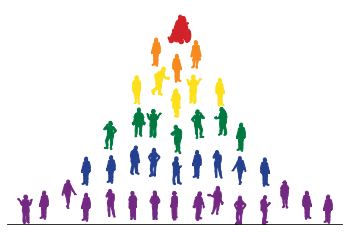

In [5]:
# Change the value of seed to get different people in different places
seed = 278 
npr.seed(seed)

# Vector of ASCII character codes to choose from (upper and lower case letters)
ascii_letters = np.hstack((np.arange(65,91), np.arange(97,123)) )


# Use the standard normal distribution. We can relabel the axes however we want later 
X=stats.norm()
x=np.arange(-3,3.2,0.43)

# Create a vector to keep track of which symbols we have used recently so we don't
# reuse symbols in the same area
recents=np.zeros(10)
recent_index=0

pride_colors = ['#D12229', '#F68A1E', '#FDE01A', '#007940', '#24408E', 
                '#732982']
height=0.075
for t in x:
  # Change color once we get an x-axis value greater than or equal to 1

    
  # Get the value of the pdf at this x-axis value
  p = X.pdf(t)
  
  # Determine how many people we can stack based on the pdf height
  steps = int(np.ceil(p/height)-0.5)
  
  # Draw all the people at this x-axis value, except the top one

  for i in range( steps ):
    color=pride_colors[5-i]
    pos = i*p/steps + (p - (steps)*height)/(steps-i+2)
    # Add random shifts to the position to make
    # the plot more interesting
    pos += 0.005*X.rvs()+0.006
    t += 0.02*X.rvs()+0.005
    
    # These offsets are to optimize some positions in the example
    if np.round(t,1) == 0.4 and np.round(pos,1) == 0.3:
      t +=0.02
      pos -=0.02

    # Choose a character number at random, but not recent
    charnum = npr.choice(ascii_letters)
    while charnum in recents:
      charnum = npr.choice(ascii_letters) # npr.randint(97, 97+26)
    
    # Update the recents vector
    recents[recent_index] = charnum
    recent_index = (recent_index + 1) % 10
    
    # Make into character and plot corresponding marker
    char = chr(charnum)
    plt.scatter(t, pos , marker=get_marker(char), 
                s=(1+0.02*npr.randn())*3000, c=color)
  
  # Treat the top marker special, but basically same as above
  charnum = npr.randint(97, 97+26)

  color = pride_colors[5-steps]

  while charnum in recents:
    charnum = npr.randint(97, 97+26)
  recents[recent_index] = charnum
  recent_index = (recent_index + 1) % 15
  char = chr(charnum)
  pos = p 
  # This is because I wanted the wheelchair glyph at the top
  if np.round(t,1) == 0:
    char = 't'
    t+=0.15
    pos+=0.02
  plt.scatter(t, pos, marker=get_marker(char),
                  s=(1+0.02*npr.randn())*3000, c=color)
  
# Set the axes for this example  
plt.xlim(-3.3, 3.3)
plt.ylim(0, 0.5);

# Turn off the y-axis for aesthetics
ax = plt.gca()
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([])


ax.get_yaxis().set_visible(False)

# Relabel to match some real data
#plt.title('Distribution of Heights of Men in the US')
#plt.xticks(np.arange(-3, 4), ["5' 1\"", "5' 4\"", "5' 7\"", "5' 10\"", "6' 1\"", "6' 4\"", "6' 7\""])

plt.savefig('normal-people2.png', dpi=300)